# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [146]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [147]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [148]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 




In [149]:
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']

['setosa', 'versicolor', 'virginica']

In [100]:
data_frame=pd.DataFrame(iris_data.data)
data_frame.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

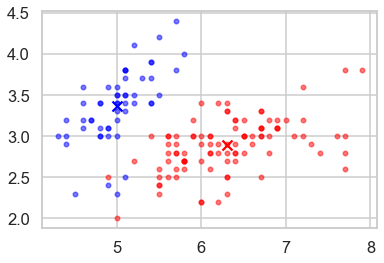

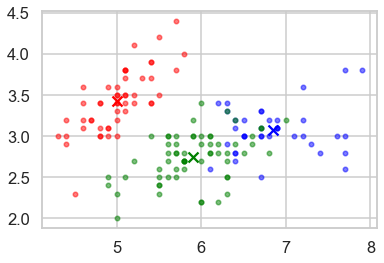

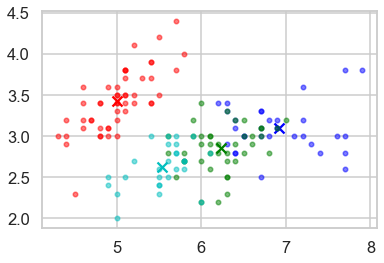

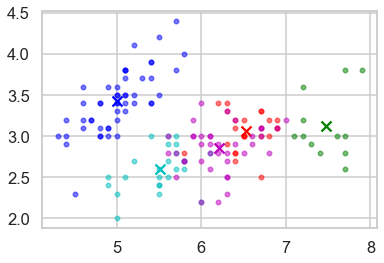

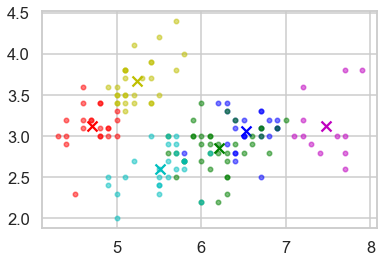

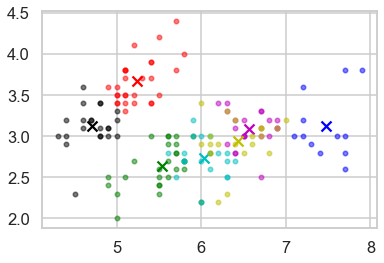

In [102]:
from sklearn.cluster import KMeans
import numpy as np

def display_cluster(X,km=[],cluster_centers=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            #print(i)
            plt.scatter(X[km==i,0],X[km==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(cluster_centers[i][0],cluster_centers[i][1],c = color[i], marker = 'x', s = 100)
disortion_array=[]
silhouette_scores=[]
K=[2,3,4,5,6,7]
for i in K:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(iris_data.data)
    plt.figure() 
    display_cluster(iris_data.data,kmeans.labels_,kmeans.cluster_centers_,i)
    disortion_array.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(iris_data.data,kmeans.labels_,metric='euclidean'))


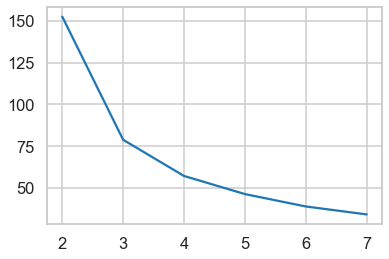

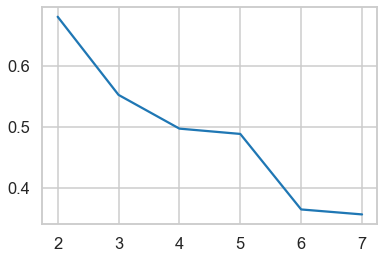

0.4887488870931048


In [107]:

#distortion function
plt.plot(K,disortion_array)   
plt.show() 
#silhouette score plotting
plt.plot(K,silhouette_scores)   
plt.show() 
#best silhouette score (FROM GRAPHES)
best_silhouette_score_TOTAL=[]
best_silhouette_score_TOTAL.append(silhouette_scores[3])
print(silhouette_scores[3])

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [125]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


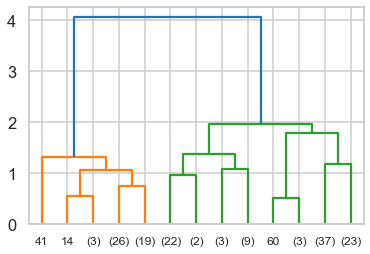

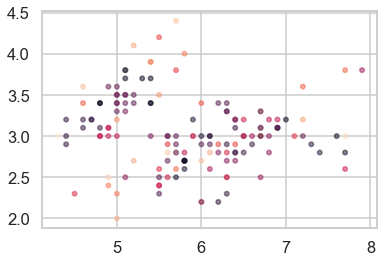

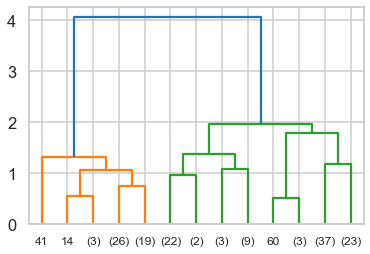

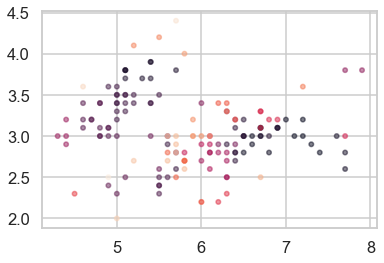

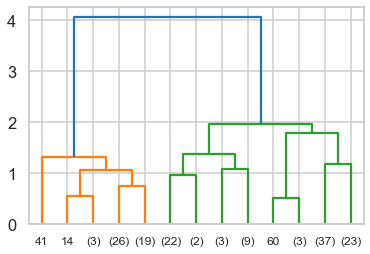

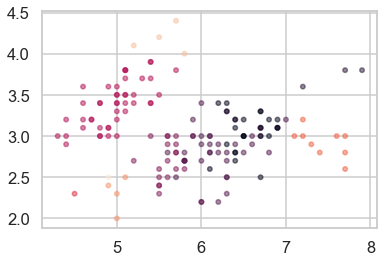

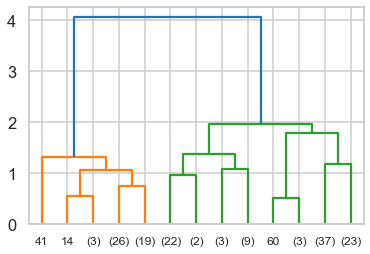

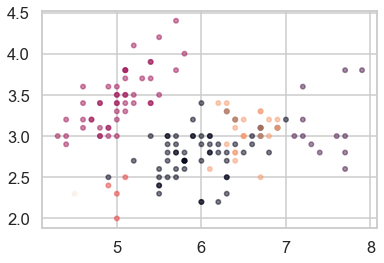

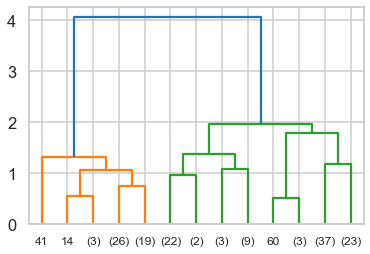

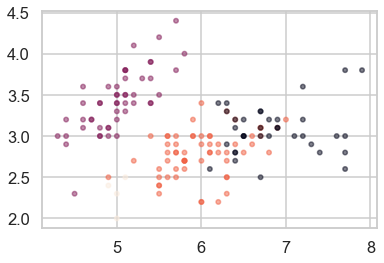

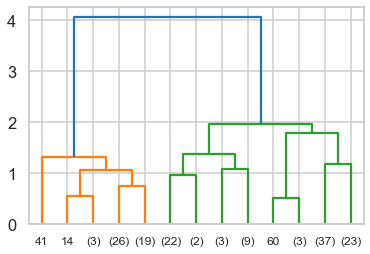

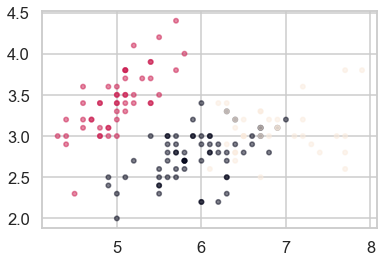

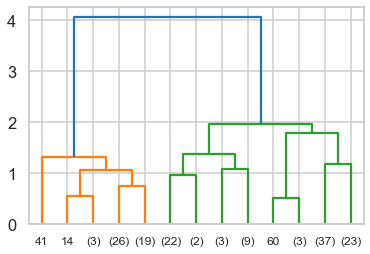

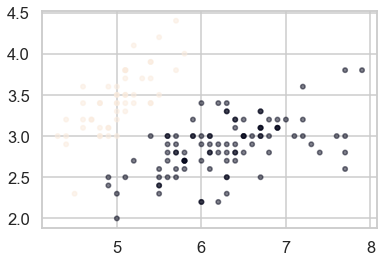

0.6867350732769776


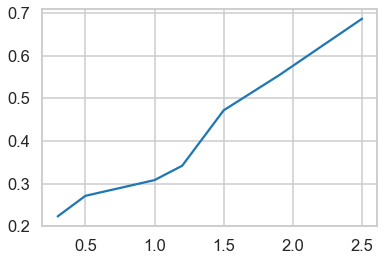

In [126]:
from sklearn.cluster import AgglomerativeClustering 
Distances=[0.3,0.5,1,1.2,1.5,1.9,2.5]
#color = 'brgcmyk'
best_silhouette_score_HC=[]
silhouette_scores_2=[]
for i in Distances:
    clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='average', distance_threshold=i).fit(iris_data.data)
    plot_dendrogram(clustering, truncate_mode="level", p=3)
    plt.show()
    plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = clustering.labels_ ,alpha = 0.5,s = 20)
    plt.show()
    silhouette_scores_2.append(silhouette_score(iris_data.data, clustering.labels_, metric='euclidean'))
plt.plot(Distances,silhouette_scores_2)    
best_silhouette_score_HC.append(max(silhouette_scores_2))
print(max(silhouette_scores_2))



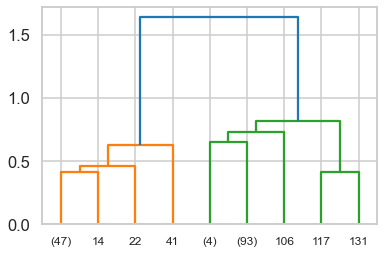

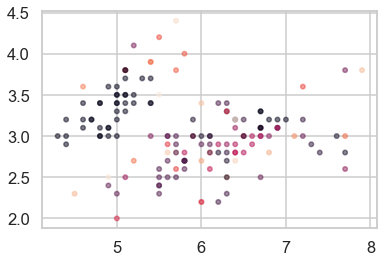

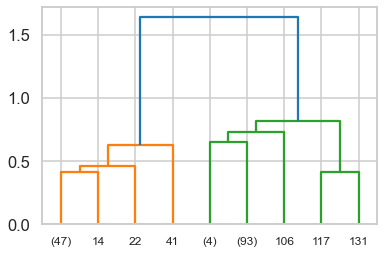

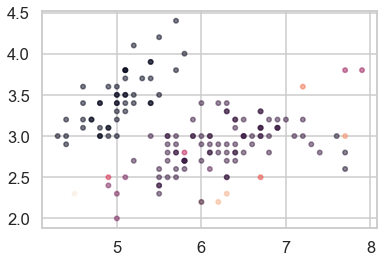

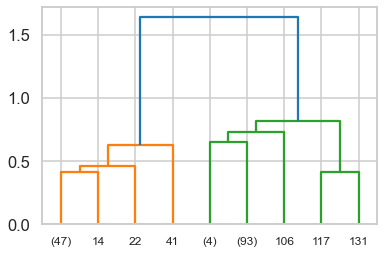

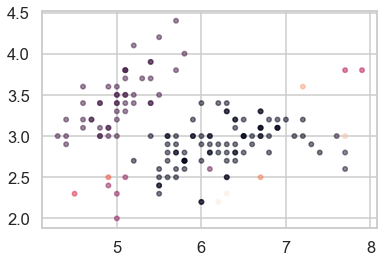

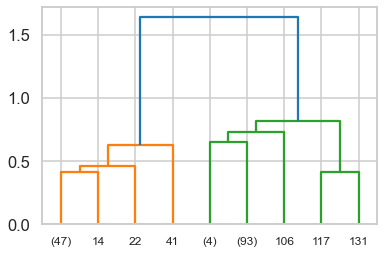

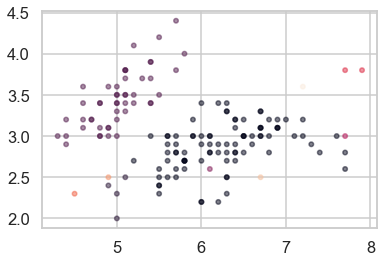

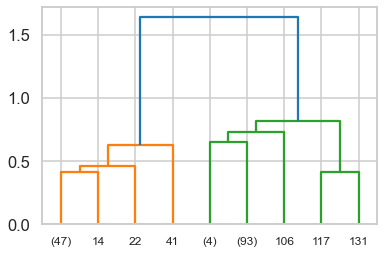

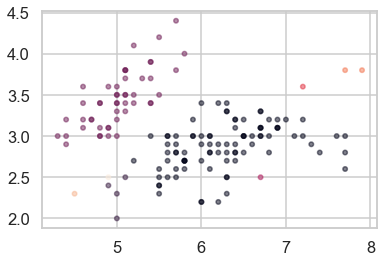

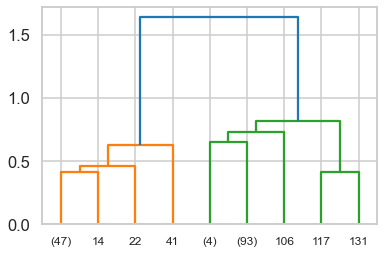

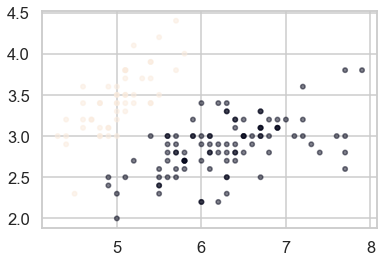

0.6867350732769776


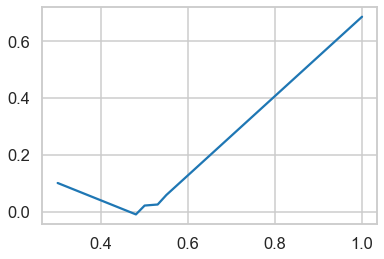

In [127]:
from sklearn.cluster import AgglomerativeClustering 
Distances=[0.3,0.48,0.5,0.53,0.55,1]
#color = 'brgcmyk'
silhouette_scores_3=[]
for i in Distances:
    clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean',  linkage='single', distance_threshold=i).fit(iris_data.data)
    plot_dendrogram(clustering, truncate_mode="level", p=3)
    plt.show()
    plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = clustering.labels_ ,alpha = 0.5,s = 20)
    plt.show()
    silhouette_scores_3.append(silhouette_score(iris_data.data, clustering.labels_, metric='euclidean'))
plt.plot(Distances,silhouette_scores_3)    
best_silhouette_score_HC.append(max(silhouette_scores_3))
print(max(silhouette_scores_3))
#print(best_silhouette_score)

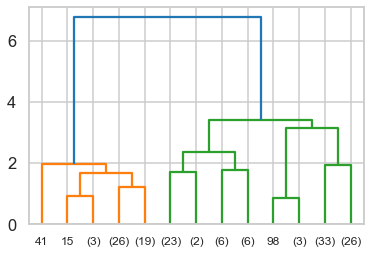

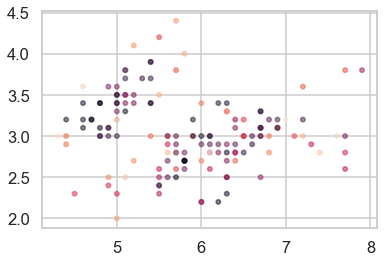

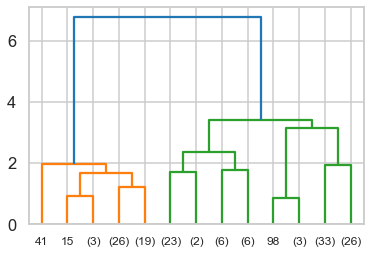

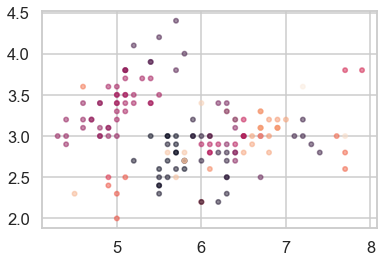

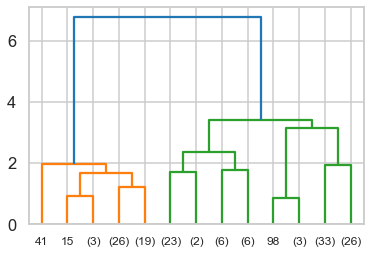

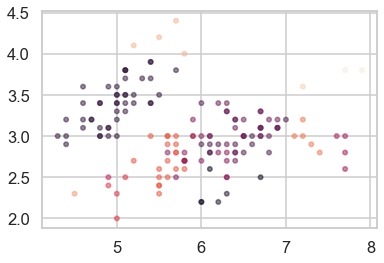

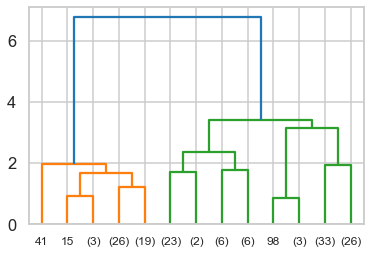

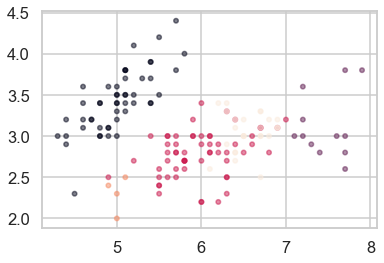

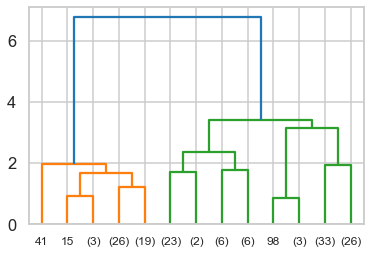

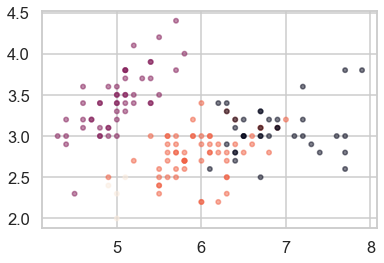

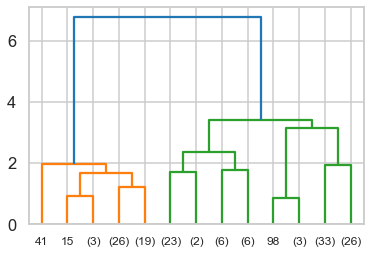

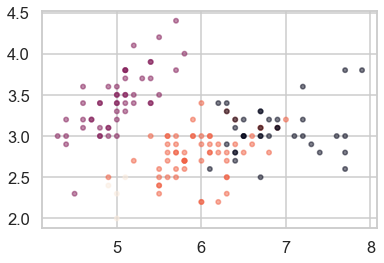

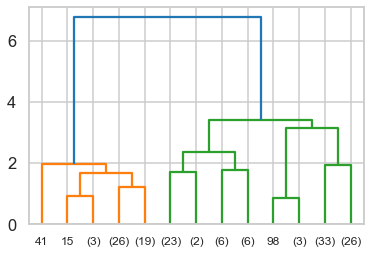

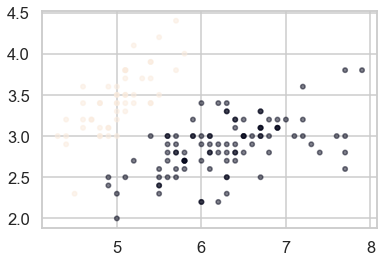

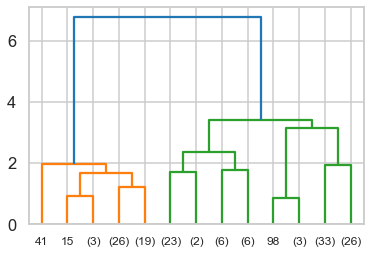

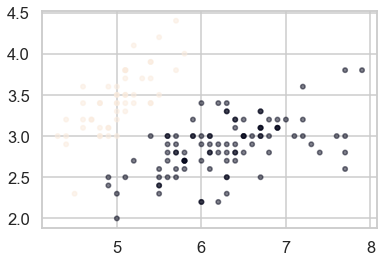

0.6867350732769776


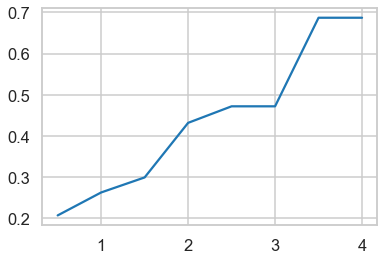

In [128]:
from sklearn.cluster import AgglomerativeClustering 
Distances=[0.5,1,1.5,2,2.5,3,3.5,4]
#color = 'brgcmyk'
silhouette_scores_4=[]
for i in Distances:
    clustering = AgglomerativeClustering(n_clusters=None, affinity='manhattan',  linkage='average', distance_threshold=i).fit(iris_data.data)
    plot_dendrogram(clustering, truncate_mode="level", p=3)
    plt.show()
    plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = clustering.labels_ ,alpha = 0.5,s = 20)
    plt.show()
    silhouette_scores_4.append(silhouette_score(iris_data.data, clustering.labels_, metric='euclidean'))
plt.plot(Distances,silhouette_scores_4)    
best_silhouette_score_HC.append(max(silhouette_scores_4))
print(max(silhouette_scores_4))
#print(best_silhouette_score)

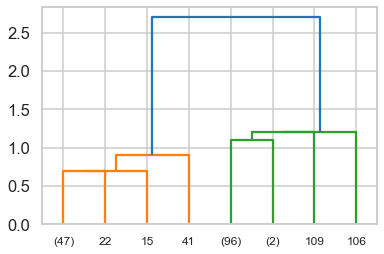

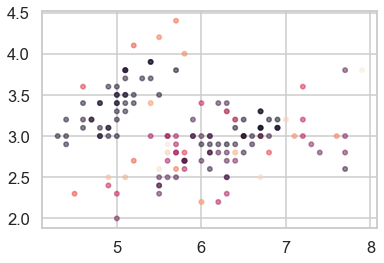

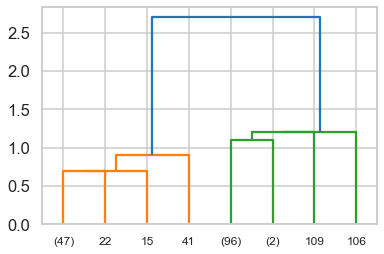

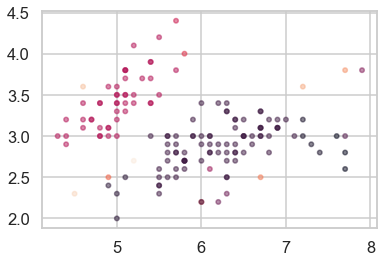

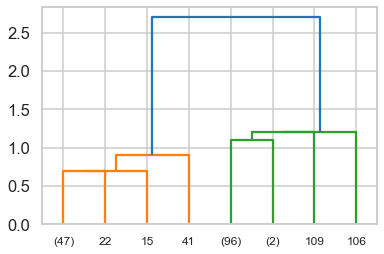

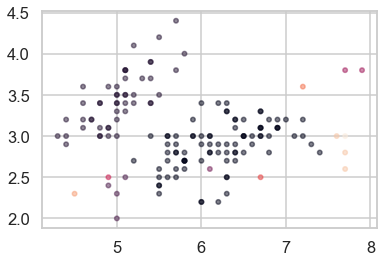

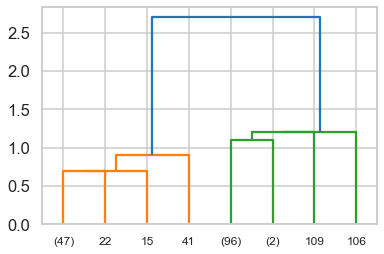

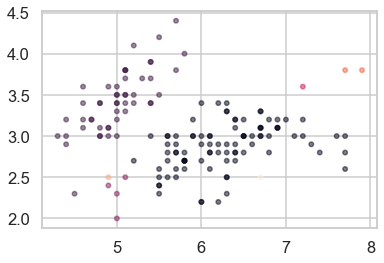

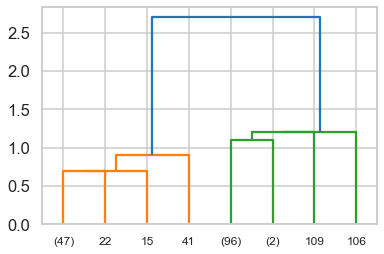

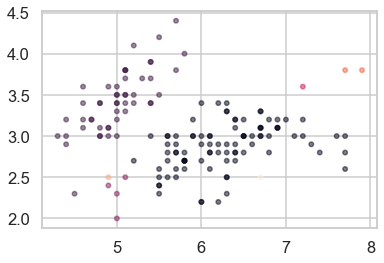

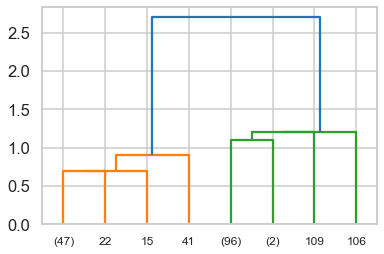

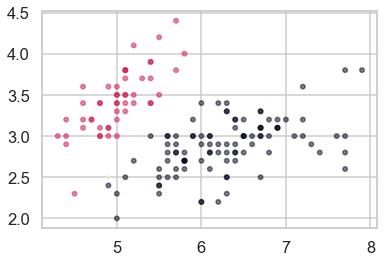

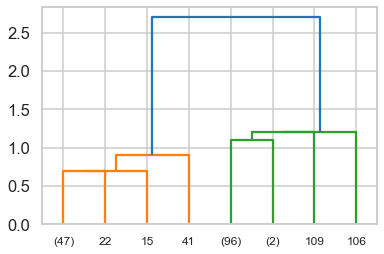

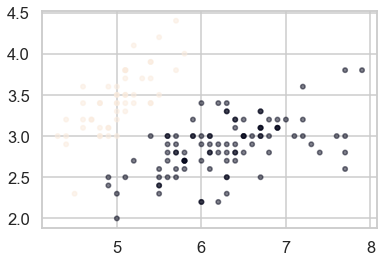

0.6867350732769776


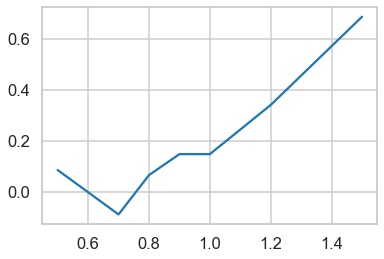

In [129]:
from sklearn.cluster import AgglomerativeClustering 
Distances=[0.5,0.7,0.8,0.9,1,1.2,1.5]
#color = 'brgcmyk'
silhouette_scores_5=[]
for i in Distances:
    clustering = AgglomerativeClustering(n_clusters=None, affinity='manhattan',  linkage='single', distance_threshold=i).fit(iris_data.data)
    plot_dendrogram(clustering, truncate_mode="level", p=3)
    plt.show()
    plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = clustering.labels_ ,alpha = 0.5,s = 20)
    plt.show()
    silhouette_scores_5.append(silhouette_score(iris_data.data, clustering.labels_, metric='euclidean'))
plt.plot(Distances,silhouette_scores_5)    
best_silhouette_score_HC.append(max(silhouette_scores_5))
print(max(silhouette_scores_5))
#print(best_silhouette_score)

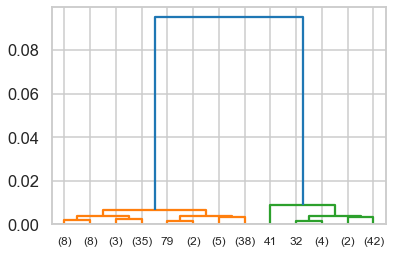

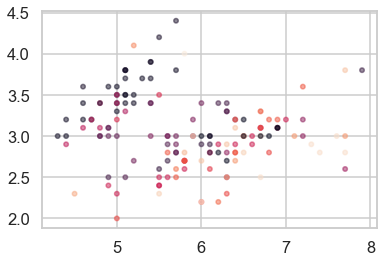

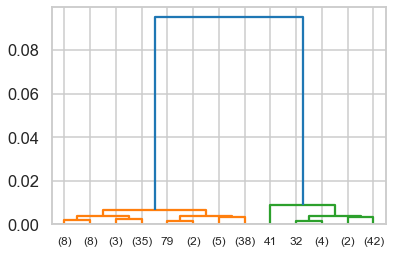

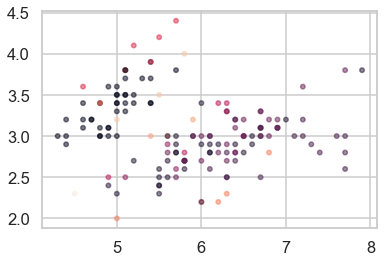

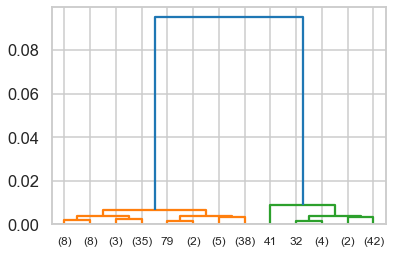

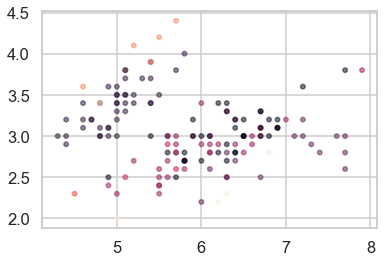

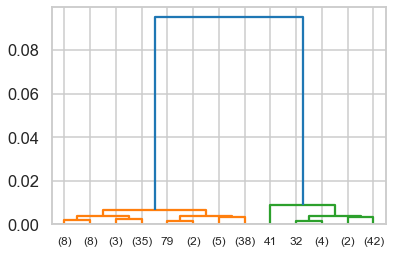

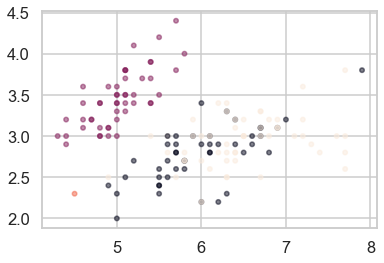

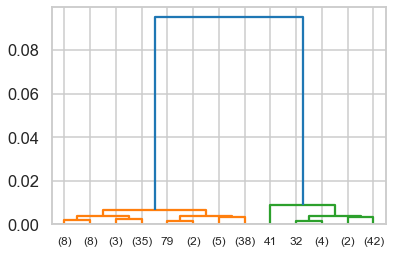

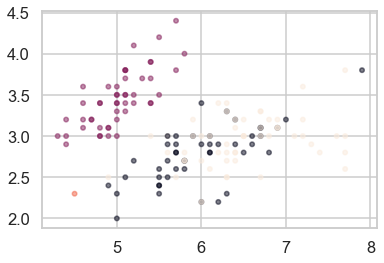

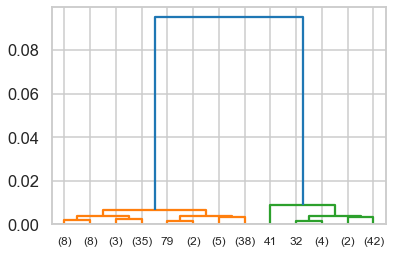

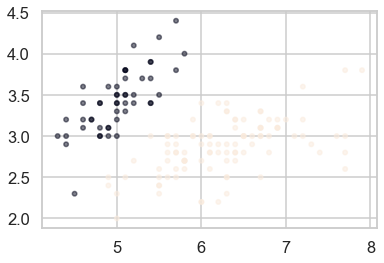

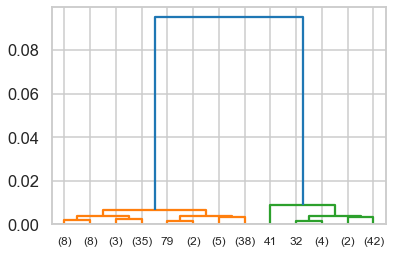

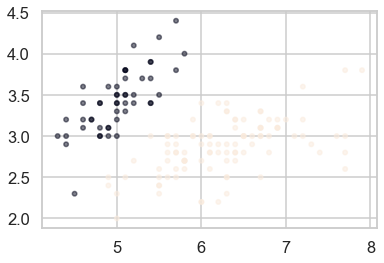

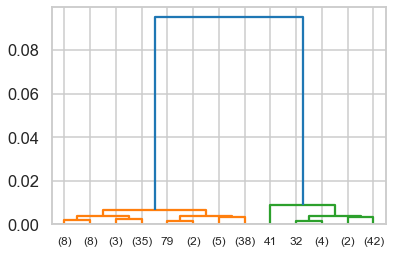

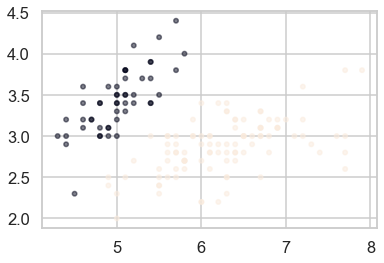

0.6867350732769776


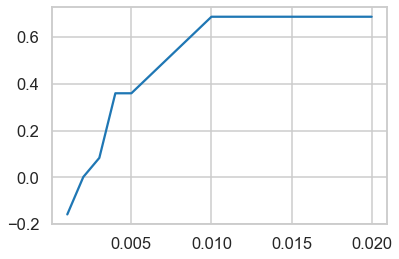

In [130]:
from sklearn.cluster import AgglomerativeClustering 
Distances=[0.001,0.002,0.003,0.004,0.005,0.01,0.012,0.02]
#color = 'brgcmyk'
silhouette_scores_6=[]
for i in Distances:
    clustering = AgglomerativeClustering(n_clusters=None, affinity='cosine',  linkage='average', distance_threshold=i).fit(iris_data.data)
    plot_dendrogram(clustering, truncate_mode="level", p=3)
    plt.show()
    plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = clustering.labels_ ,alpha = 0.5,s = 20)
    plt.show()
    silhouette_scores_6.append(silhouette_score(iris_data.data, clustering.labels_, metric='euclidean'))
plt.plot(Distances,silhouette_scores_6)    
best_silhouette_score_HC.append(max(silhouette_scores_6))
print(max(silhouette_scores_6))
#print(best_silhouette_score)

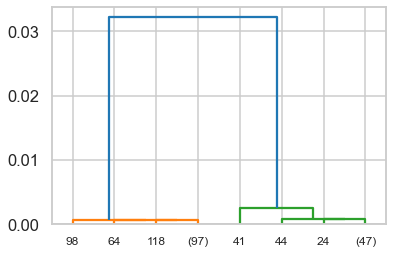

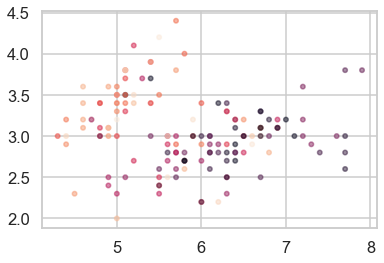

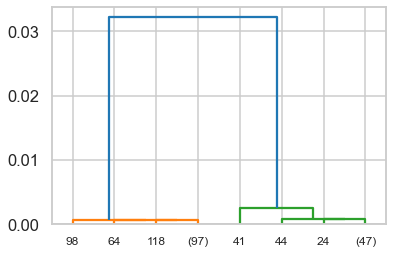

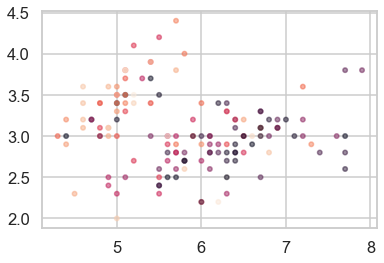

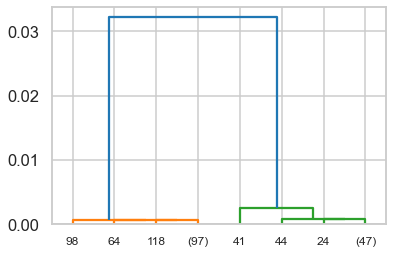

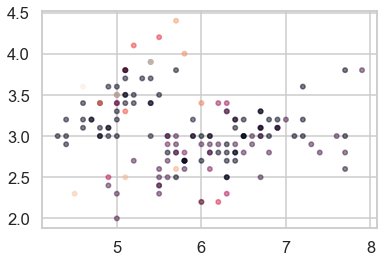

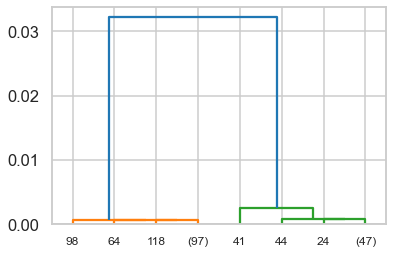

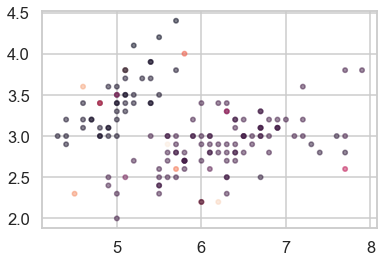

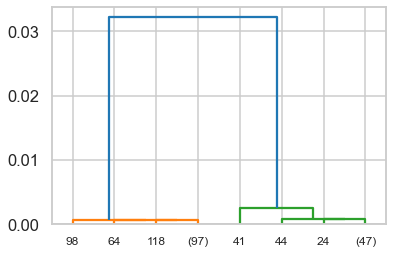

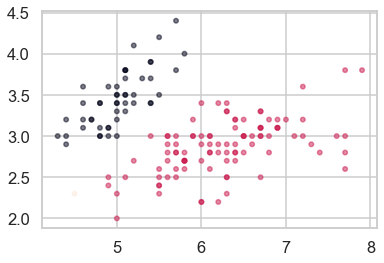

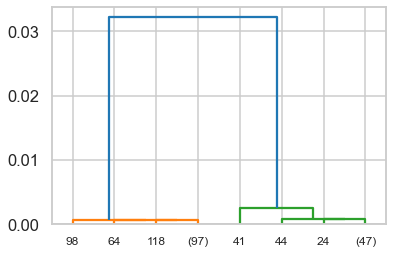

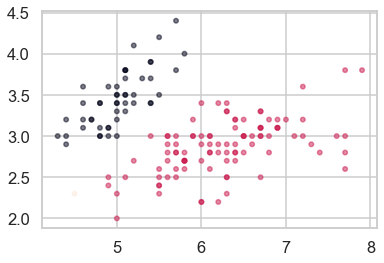

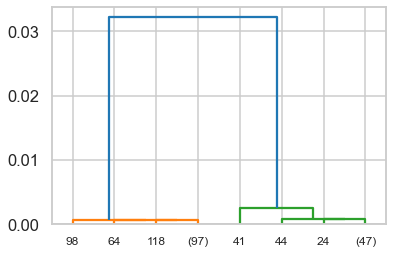

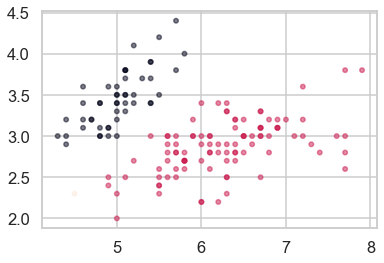

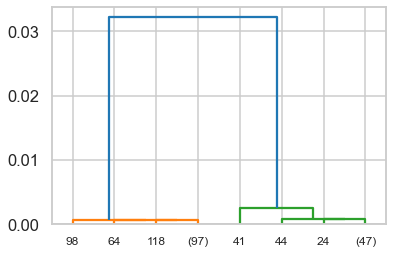

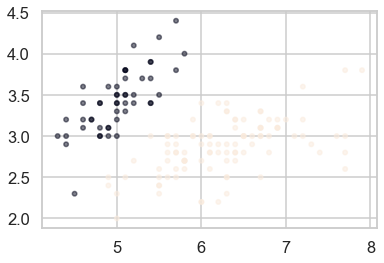

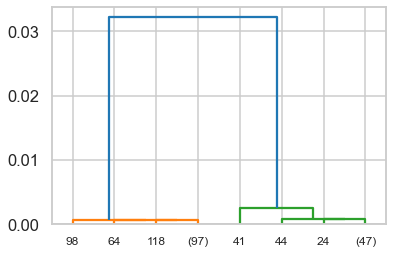

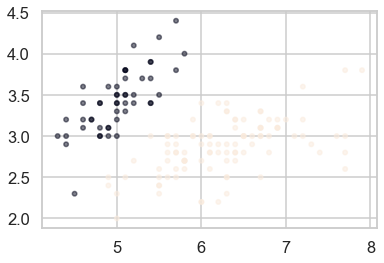

0.6867350732769776
[0.6867350732769776, 0.6867350732769776, 0.6867350732769776, 0.6867350732769776, 0.6867350732769776, 0.6867350732769776]


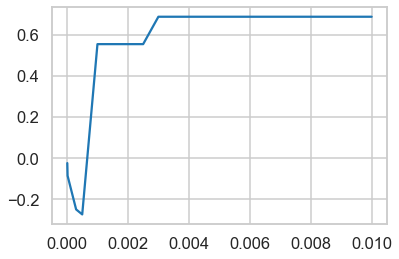

In [131]:
from sklearn.cluster import AgglomerativeClustering 
Distances=[0.00001,0.00002,0.0003,0.0005,0.001,0.002,0.0025,0.003,0.01]
#color = 'brgcmyk'
silhouette_scores_7=[]
for i in Distances:
    clustering = AgglomerativeClustering(n_clusters=None, affinity='cosine',  linkage='single', distance_threshold=i).fit(iris_data.data)
    plot_dendrogram(clustering, truncate_mode="level", p=3)
    plt.show()
    plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = clustering.labels_ ,alpha = 0.5,s = 20)
    plt.show()
    silhouette_scores_7.append(silhouette_score(iris_data.data, clustering.labels_, metric='euclidean'))
plt.plot(Distances,silhouette_scores_7)    
best_silhouette_score_HC.append(max(silhouette_scores_7))
print(max(silhouette_scores_7))
print(best_silhouette_score_HC)


In [132]:
# best silhouette_score hierarchical clustering
print(best_silhouette_score_HC)
print(max(best_silhouette_score_HC))


[0.6867350732769776, 0.6867350732769776, 0.6867350732769776, 0.6867350732769776, 0.6867350732769776, 0.6867350732769776]
0.6867350732769776


In [133]:
# best silhouette_score hierarchical clustering
print(best_silhouette_score_HC)
print(max(best_silhouette_score_HC))
# SO THAT ALL THE PARAMETERS HAVE THE SAME SCOREEEE 


[0.6867350732769776, 0.6867350732769776, 0.6867350732769776, 0.6867350732769776, 0.6867350732769776, 0.6867350732769776]
0.6867350732769776


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

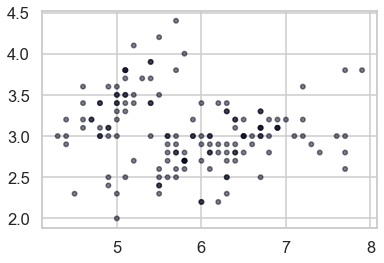

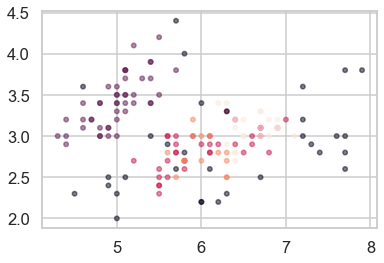

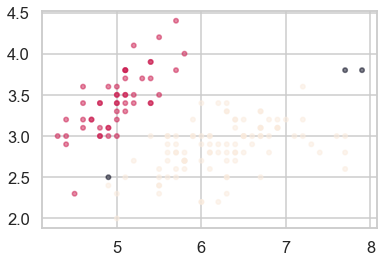

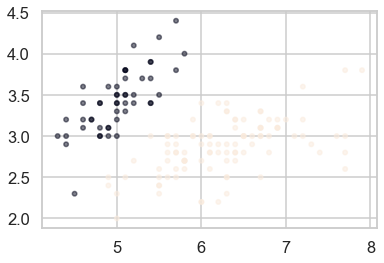

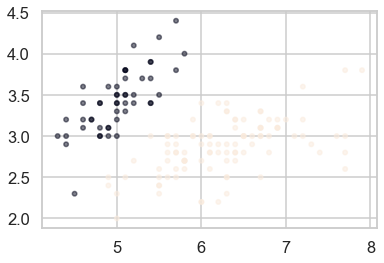

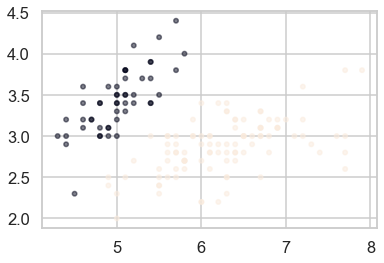

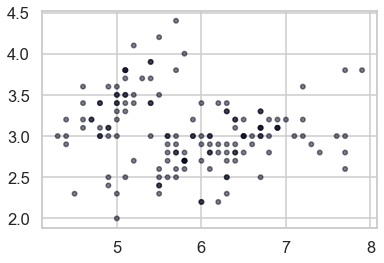

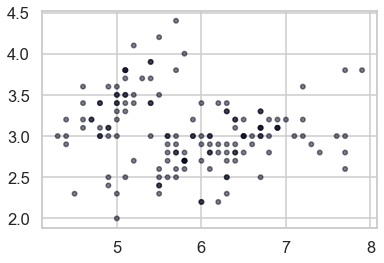

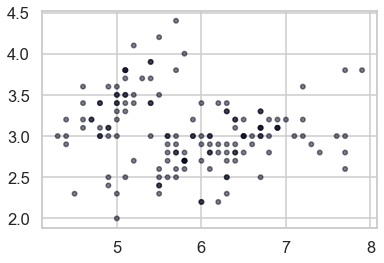

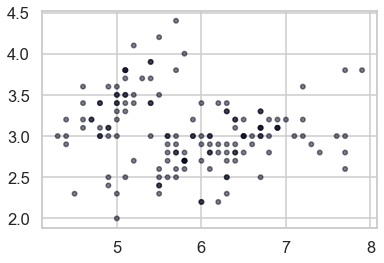

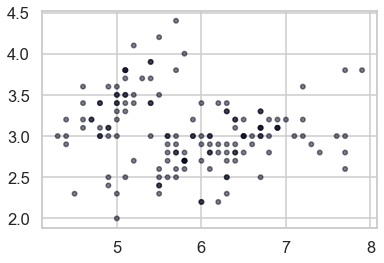

0.6867350732769776


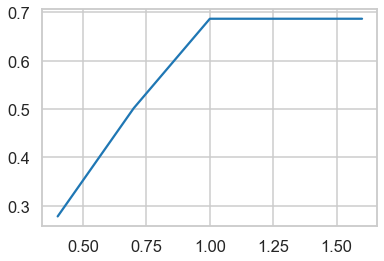

In [134]:
#Best_silhouette_score_DB  for min_sample = 5
from sklearn.cluster import DBSCAN
Best_silhouette_score_DB_5=[]
#EPS=[0.1,0.5,1,1.5,2,2.5,3]
EPS=[0.1,0.4,0.7,1,1.3,1.6,1.9,2.1,2.4,2.7,3]
Min_Samples=5
EPS_1=[]
Best_silhouette_score_DB_TOTAL=[]
for j in EPS:
        clustering_DB = DBSCAN(eps=j, min_samples=Min_Samples).fit(iris_data.data)
        plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = clustering_DB.labels_ ,alpha = 0.5,s = 20)
        plt.show()
        if np.unique(clustering_DB.labels_).shape[0]>1:
            Best_silhouette_score_DB_5.append(silhouette_score(iris_data.data, clustering_DB.labels_, metric='euclidean'))
            EPS_1.append(j)
plt.plot(EPS_1,Best_silhouette_score_DB_5) 
print(max(Best_silhouette_score_DB_5))
Best_silhouette_score_DB_TOTAL.append(max(Best_silhouette_score_DB_5))


#so from graph Best_silhouette_score_DB  for min_sample = 5 is at (EPS=1)


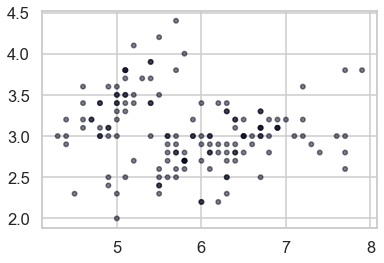

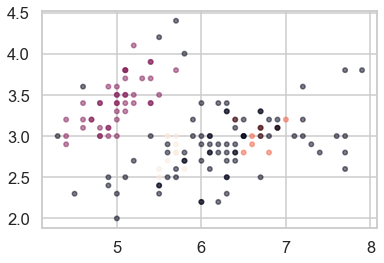

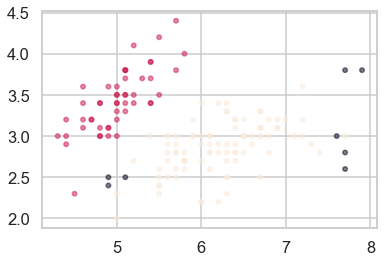

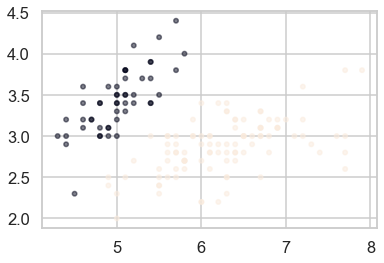

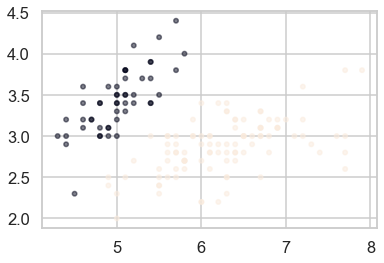

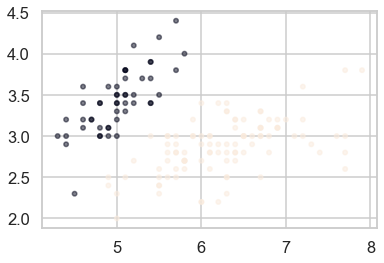

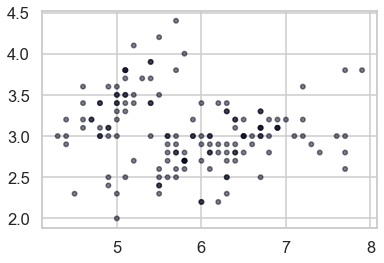

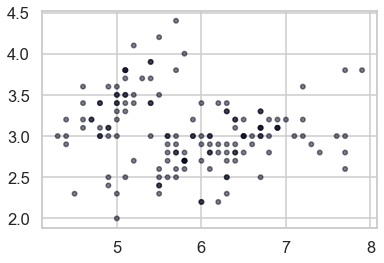

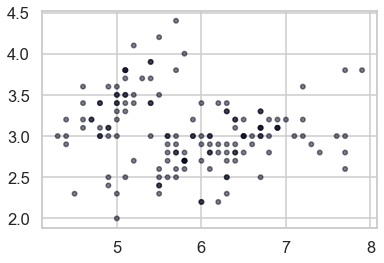

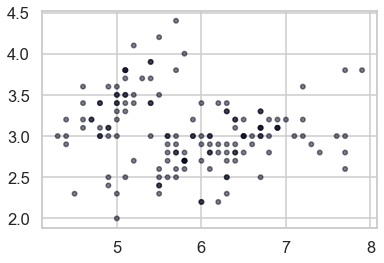

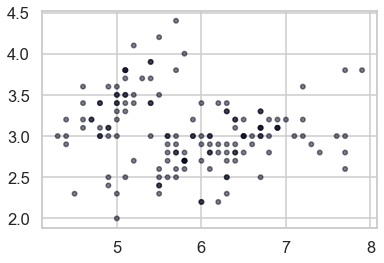

0.6867350732769776


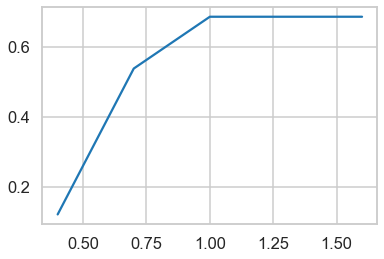

In [135]:
#Best_silhouette_score_DB  for min_sample = 10
from sklearn.cluster import DBSCAN
Best_silhouette_score_DB_10=[]
#EPS=[0.1,0.5,1,1.5,2,2.5,3]
EPS=[0.1,0.4,0.7,1,1.3,1.6,1.9,2.1,2.4,2.7,3]
Min_Samples=10
EPS_1=[]

for j in EPS:
        clustering_DB = DBSCAN(eps=j, min_samples=Min_Samples).fit(iris_data.data)
        plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = clustering_DB.labels_ ,alpha = 0.5,s = 20)
        plt.show()
        if np.unique(clustering_DB.labels_).shape[0]>1:
            Best_silhouette_score_DB_10.append(silhouette_score(iris_data.data, clustering_DB.labels_, metric='euclidean'))
            EPS_1.append(j)
plt.plot(EPS_1,Best_silhouette_score_DB_10) 
print(max(Best_silhouette_score_DB_10))
Best_silhouette_score_DB_TOTAL.append(max(Best_silhouette_score_DB_10))


#so from graph Best_silhouette_score_DB  for min_sample = 10 is at (EPS=1)

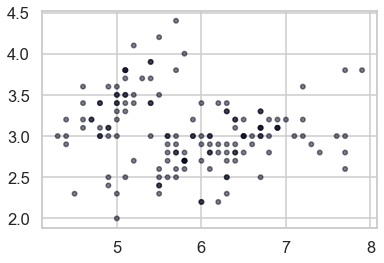

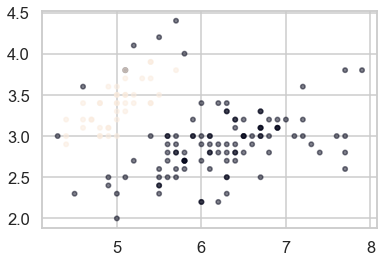

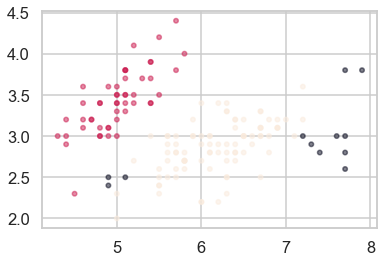

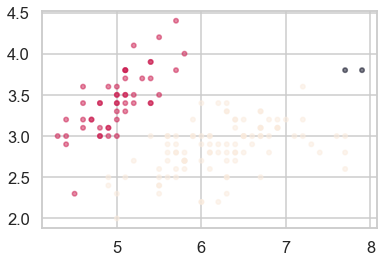

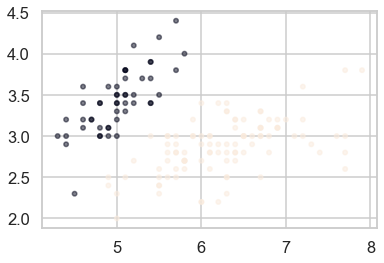

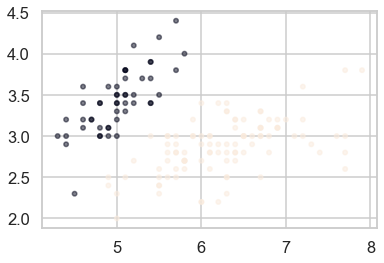

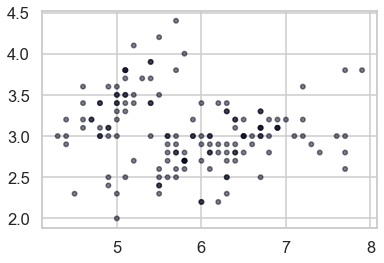

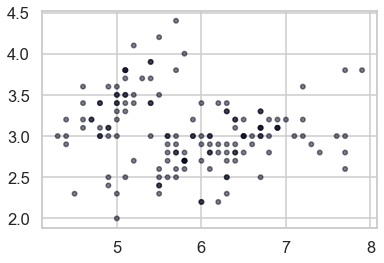

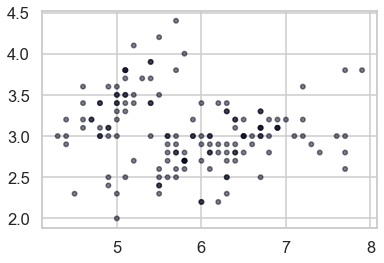

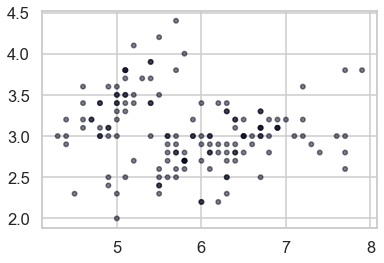

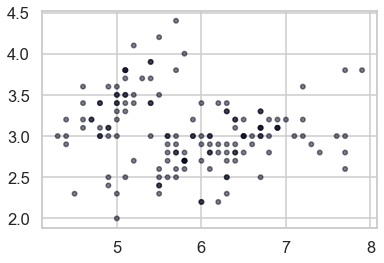

0.6867350732769776


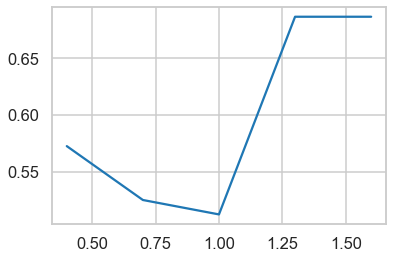

In [136]:
#Best_silhouette_score_DB  for min_sample = 15
from sklearn.cluster import DBSCAN
Best_silhouette_score_DB_15=[]
#EPS=[0.1,0.5,1,1.5,2,2.5,3]
EPS=[0.1,0.4,0.7,1,1.3,1.6,1.9,2.1,2.4,2.7,3]
Min_Samples=15
EPS_1=[]

for j in EPS:
        clustering_DB = DBSCAN(eps=j, min_samples=Min_Samples).fit(iris_data.data)
        plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = clustering_DB.labels_ ,alpha = 0.5,s = 20)
        plt.show()
        if np.unique(clustering_DB.labels_).shape[0]>1:
            Best_silhouette_score_DB_15.append(silhouette_score(iris_data.data, clustering_DB.labels_, metric='euclidean'))
            EPS_1.append(j)
plt.plot(EPS_1,Best_silhouette_score_DB_15) 
print(max(Best_silhouette_score_DB_15))
Best_silhouette_score_DB_TOTAL.append(max(Best_silhouette_score_DB_15))


#so from graph Best_silhouette_score_DB  for min_sample = 15 is at (EPS=1.3)

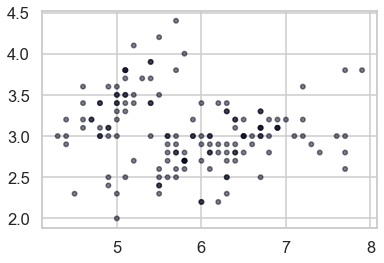

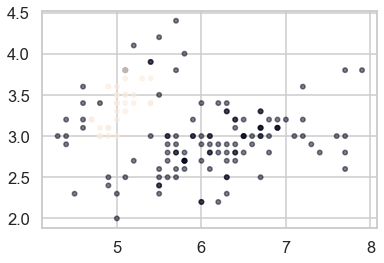

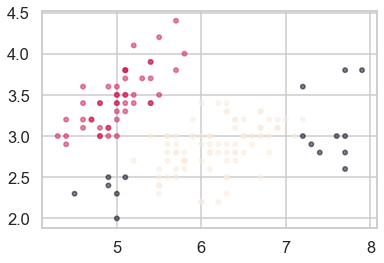

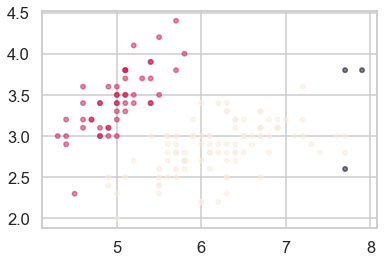

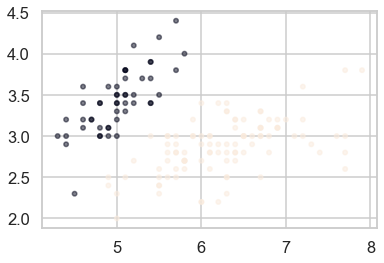

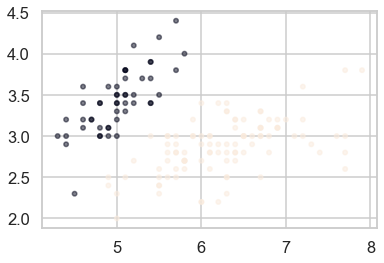

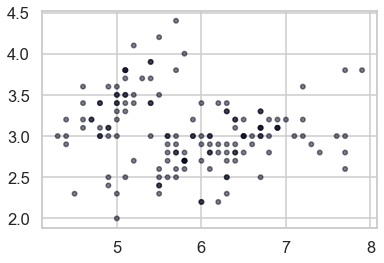

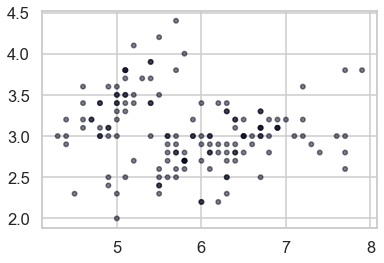

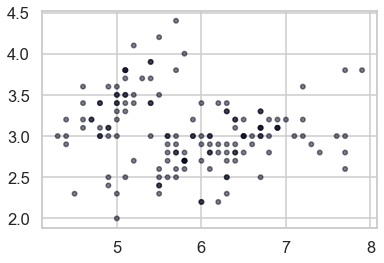

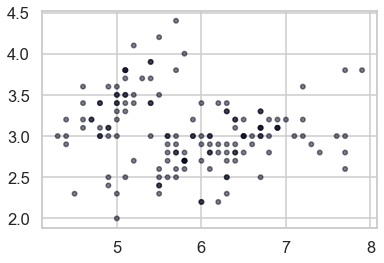

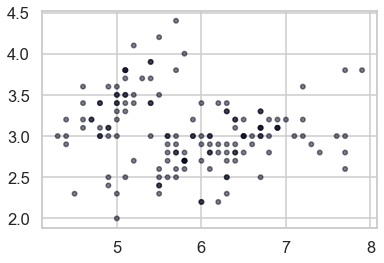

0.6867350732769776


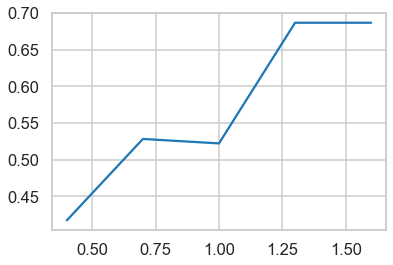

In [137]:
#Best_silhouette_score_DB  for min_sample = 20
from sklearn.cluster import DBSCAN
Best_silhouette_score_DB_20=[]
#EPS=[0.1,0.5,1,1.5,2,2.5,3]
EPS=[0.1,0.4,0.7,1,1.3,1.6,1.9,2.1,2.4,2.7,3]
Min_Samples=20
EPS_1=[]

for j in EPS:
        clustering_DB = DBSCAN(eps=j, min_samples=Min_Samples).fit(iris_data.data)
        plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = clustering_DB.labels_ ,alpha = 0.5,s = 20)
        plt.show()
        if np.unique(clustering_DB.labels_).shape[0]>1:
            Best_silhouette_score_DB_20.append(silhouette_score(iris_data.data, clustering_DB.labels_, metric='euclidean'))
            EPS_1.append(j)
plt.plot(EPS_1,Best_silhouette_score_DB_20) 
print(max(Best_silhouette_score_DB_20))
Best_silhouette_score_DB_TOTAL.append(max(Best_silhouette_score_DB_20))

#so from graph Best_silhouette_score_DB  for min_sample = 20 is at (EPS=1.3)

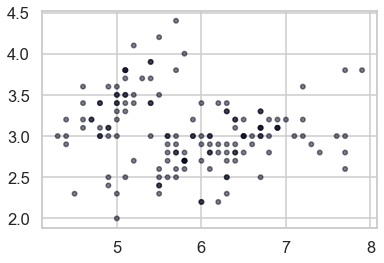

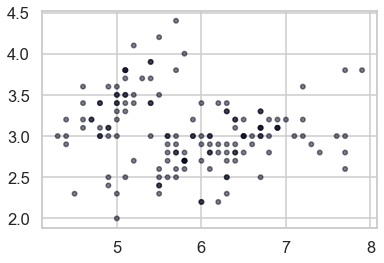

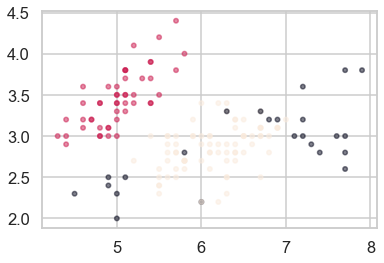

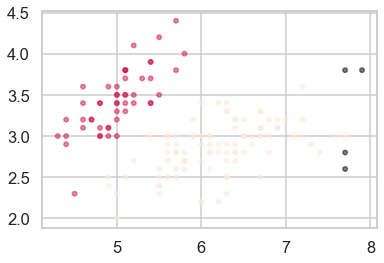

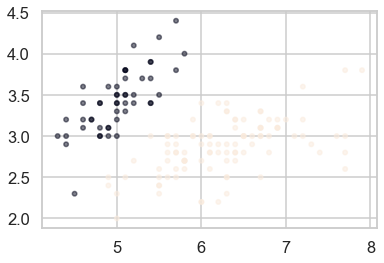

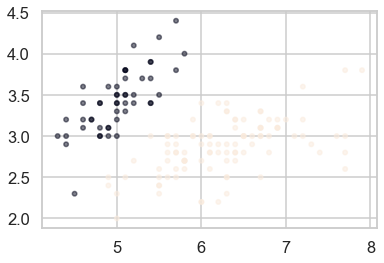

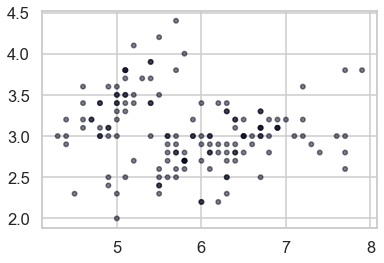

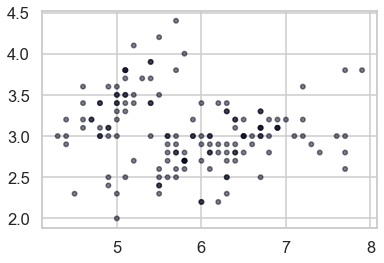

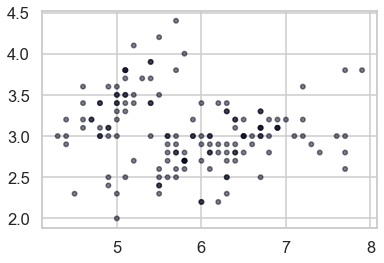

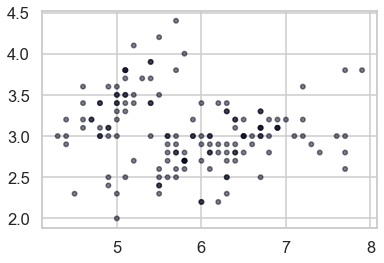

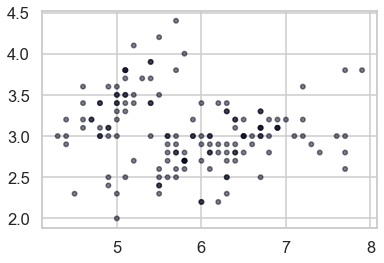

0.6867350732769776


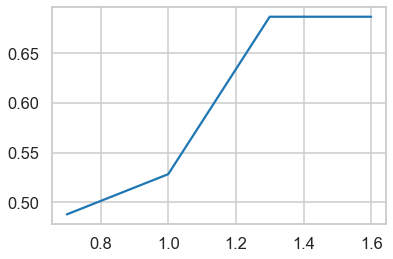

In [141]:
#Best_silhouette_score_DB  for min_sample = 25
from sklearn.cluster import DBSCAN
Best_silhouette_score_DB_25=[]
#EPS=[0.1,0.5,1,1.5,2,2.5,3]
EPS=[0.1,0.4,0.7,1,1.3,1.6,1.9,2.1,2.4,2.7,3]
Min_Samples=25
EPS_1=[]

for j in EPS:
        clustering_DB = DBSCAN(eps=j, min_samples=Min_Samples).fit(iris_data.data)
        plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = clustering_DB.labels_ ,alpha = 0.5,s = 20)
        plt.show()
        if np.unique(clustering_DB.labels_).shape[0]>1:
            Best_silhouette_score_DB_25.append(silhouette_score(iris_data.data, clustering_DB.labels_, metric='euclidean'))
            EPS_1.append(j)
plt.plot(EPS_1,Best_silhouette_score_DB_25) 
print(max(Best_silhouette_score_DB_25))
Best_silhouette_score_DB_TOTAL.append(max(Best_silhouette_score_DB_25))

#so from graph Best_silhouette_score_DB  for min_sample = 25 is at (EPS=1.3)

In [142]:
#Best_silhouette_score_DB  for all
print(Best_silhouette_score_DB_TOTAL)
print(max(Best_silhouette_score_DB_TOTAL))

[0.6867350732769776, 0.6867350732769776, 0.6867350732769776, 0.6867350732769776, 0.6867350732769776]
0.6867350732769776


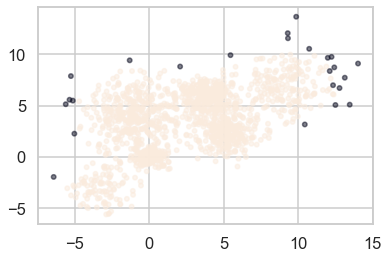

0.6867350732769776


In [143]:
#from the previous trails Best_silhouette_score_DB   for all is  equal so we use at (EPS=1.3) and (Min_score=15,20 or 25) so i will choose 20 for example
from sklearn.cluster import DBSCAN
Best_silhouette_score_DB_20=[]
#EPS=[0.1,0.5,1,1.5,2,2.5,3]
EPS=1.3
Min_Samples=20



clustering_DB = DBSCAN(eps=EPS, min_samples=Min_Samples).fit(Multi_blob_Data)
plt.scatter(Multi_blob_Data[:,0],Multi_blob_Data[:,1],c = clustering_DB.labels_ ,alpha = 0.5,s = 20)
plt.show()


print(max(Best_silhouette_score_DB_TOTAL))

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

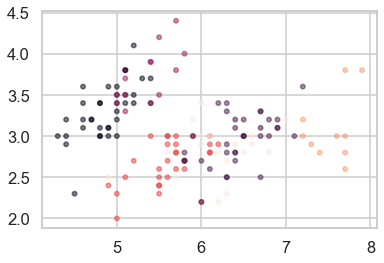

[[0.959 0.    0.041 0.    0.    0.   ]
 [0.998 0.    0.002 0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.983 0.    0.017 0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.987 0.    0.013 0.    0.    0.   ]
 [0.988 0.    0.012 0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.999 0.    0.001 0.    0.    0.   ]
 [0.709 0.    0.291 0.    0.    0.   ]
 [0.997 0.    0.003 0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.002 0.    0.998 0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.421 0.    0.579 0.    0.    0.   ]
 [0.16  0.    0.84  0.    0.    0.   ]
 [0.199 0.    0.801 0.    0.    0.   ]
 [0.972 0.    0.028 0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.993 0.    0.007 0.    0.    0.   ]
 [0.997 0.    0.003 0.   

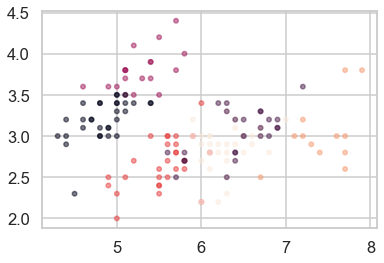

[[0.486 0.    0.514 0.    0.    0.   ]
 [0.944 0.    0.056 0.    0.    0.   ]
 [0.881 0.    0.119 0.    0.    0.   ]
 [0.952 0.    0.048 0.    0.    0.   ]
 [0.403 0.    0.597 0.    0.    0.   ]
 [0.137 0.    0.863 0.    0.    0.   ]
 [0.811 0.    0.189 0.    0.    0.   ]
 [0.687 0.    0.313 0.    0.    0.   ]
 [0.985 0.    0.015 0.    0.    0.   ]
 [0.912 0.    0.088 0.    0.    0.   ]
 [0.193 0.    0.807 0.    0.    0.   ]
 [0.784 0.    0.216 0.    0.    0.   ]
 [0.946 0.    0.054 0.    0.    0.   ]
 [0.962 0.    0.038 0.    0.    0.   ]
 [0.016 0.    0.984 0.    0.    0.   ]
 [0.005 0.    0.995 0.    0.    0.   ]
 [0.077 0.    0.923 0.    0.    0.   ]
 [0.522 0.    0.478 0.    0.    0.   ]
 [0.12  0.    0.88  0.    0.    0.   ]
 [0.218 0.    0.782 0.    0.    0.   ]
 [0.602 0.    0.398 0.    0.    0.   ]
 [0.349 0.    0.651 0.    0.    0.   ]
 [0.415 0.    0.585 0.    0.    0.   ]
 [0.867 0.    0.133 0.    0.    0.   ]
 [0.854 0.    0.146 0.    0.    0.   ]
 [0.952 0.    0.048 0.   

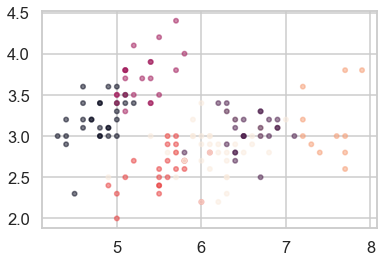

[[0.585 0.    0.415 0.    0.    0.   ]
 [0.995 0.    0.005 0.    0.    0.   ]
 [0.998 0.    0.002 0.    0.    0.   ]
 [0.999 0.    0.001 0.    0.    0.   ]
 [0.629 0.    0.371 0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.956 0.    0.044 0.    0.    0.   ]
 [0.82  0.    0.18  0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.969 0.    0.031 0.    0.    0.   ]
 [0.017 0.    0.983 0.    0.    0.   ]
 [0.949 0.    0.051 0.    0.    0.   ]
 [0.995 0.    0.005 0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.133 0.    0.867 0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.013 0.    0.987 0.    0.    0.   ]
 [0.071 0.    0.929 0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.998 0.    0.002 0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.911 0.    0.089 0.    0.    0.   ]
 [0.977 0.    0.023 0.   

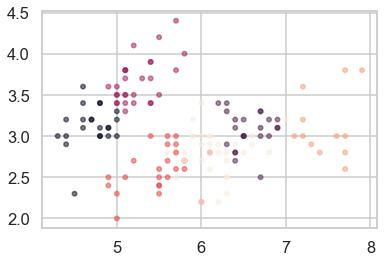

[[0.053 0.    0.947 0.    0.    0.   ]
 [0.998 0.    0.002 0.    0.    0.   ]
 [0.998 0.    0.002 0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.05  0.    0.95  0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.99  0.    0.01  0.    0.    0.   ]
 [0.405 0.    0.595 0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.993 0.    0.007 0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.872 0.    0.128 0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.044 0.    0.956 0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.001 0.    0.999 0.    0.    0.   ]
 [0.002 0.    0.998 0.    0.    0.   ]
 [0.921 0.    0.079 0.    0.    0.   ]
 [0.156 0.    0.844 0.    0.    0.   ]
 [0.703 0.    0.297 0.    0.    0.   ]
 [0.988 0.    0.012 0.   

In [145]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)






covariance_type=['full','tied','diag','spherical']
for i in covariance_type:
    GMM=GaussianMixture(n_components=6,covariance_type=i,random_state=42).fit(iris_data.data)
    plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = GMM.predict(iris_data.data) ,alpha = 0.5,s = 20)
    plt.show()
    probs = GMM.predict_proba(iris_data.data)
    print(probs[:].round(3))
    